In [30]:
import joblib
from pathlib import Path
import cv2
import mediapipe as mp

from IPython.display import Image, display

In [31]:
model = joblib.load("model-xgboost.pkl")
label_encoder = joblib.load("label-encoder.pkl")

In [32]:
def get_img():
    path = Path("../Image")

    for file in path.glob("*"):
        if file.is_file():
            return str(file)
        
    return None

In [33]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

def extract_hand_landmarks(image_path):
    image = cv2.imread(image_path)
    
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        return [coord for lm in landmarks.landmark for coord in (lm.x, lm.y)]
    
    return None

In [34]:
def get_sign():
    img_path = get_img()

    if img_path is None:
        return None;

    img_data = extract_hand_landmarks(img_path)

    display(Image(filename=img_path))

    if img_data is not None:
        img_data = [img_data]
        predict = model.predict(img_data)
        predict_label = label_encoder.inverse_transform(predict)
        return predict_label[0]
    else:
        return None

c:\Users\disrct\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


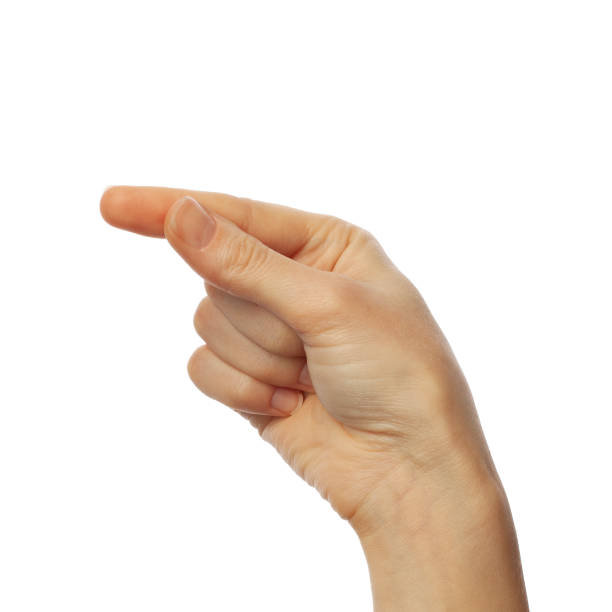

G


In [36]:
result = get_sign();

print(result if result is not None else "No sign could be identified")